dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [6]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

24/08/2023  03:14 PM    <DIR>          .
24/08/2023  03:14 PM    <DIR>          ..
29/07/2023  04:02 PM    <DIR>          .ipynb_checkpoints
20/07/2023  09:04 PM    <DIR>          dataset
24/08/2023  03:14 PM             2,659 working.ipynb
               1 File(s)          2,659 bytes
               4 Dir(s)  955,088,695,296 bytes free


# Reading a single image

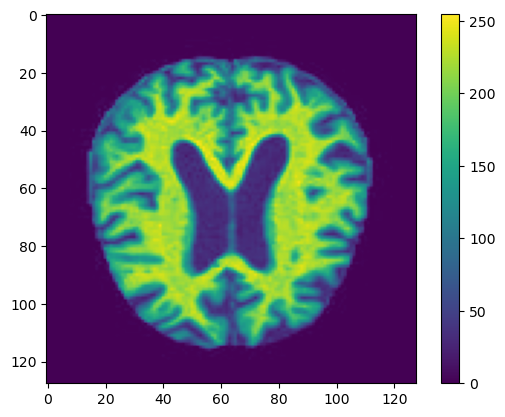

In [17]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [20]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [71]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    moderate.append(image)


In [72]:
len(very_mild)

2240

In [73]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(6400, 128, 128, 3)

In [74]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [75]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [76]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(11904, 128, 128, 3)

# Visualisation

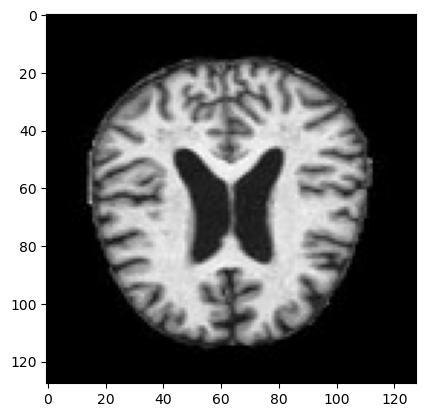

In [77]:
plt.imshow(very_mild[0])

In [82]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

Above is not very efficient, can reduce the number of 'for loops', however this is just for demonstration purposes. 

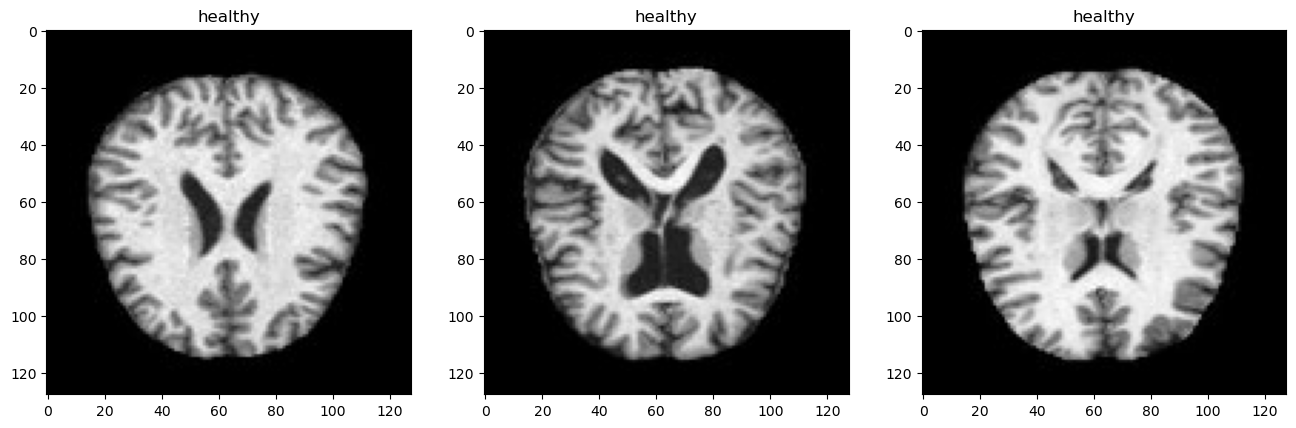

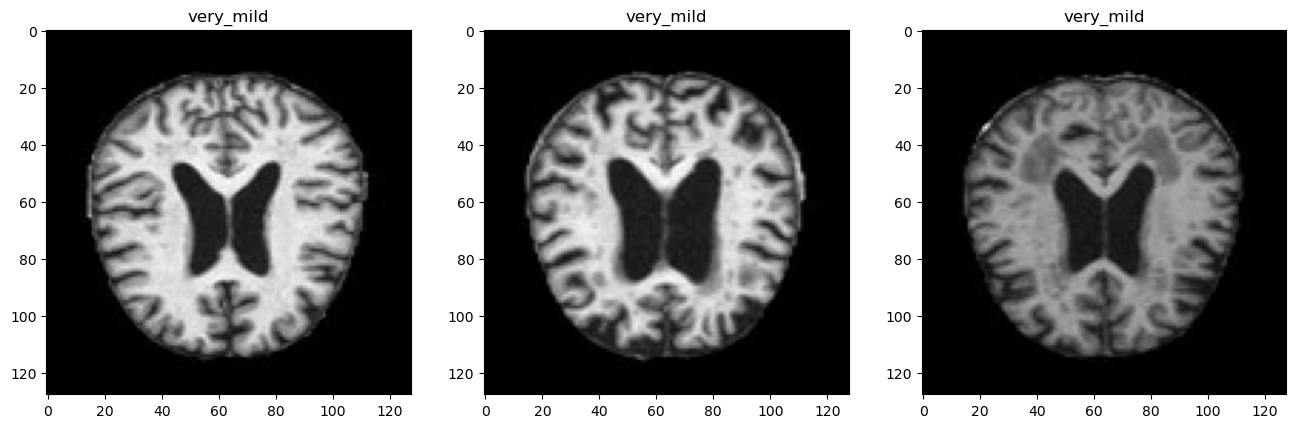

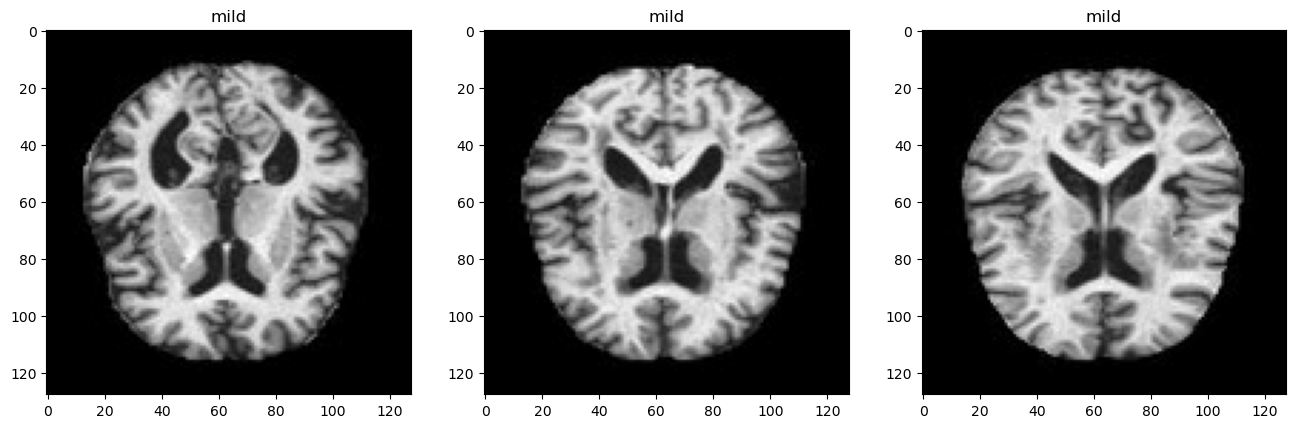

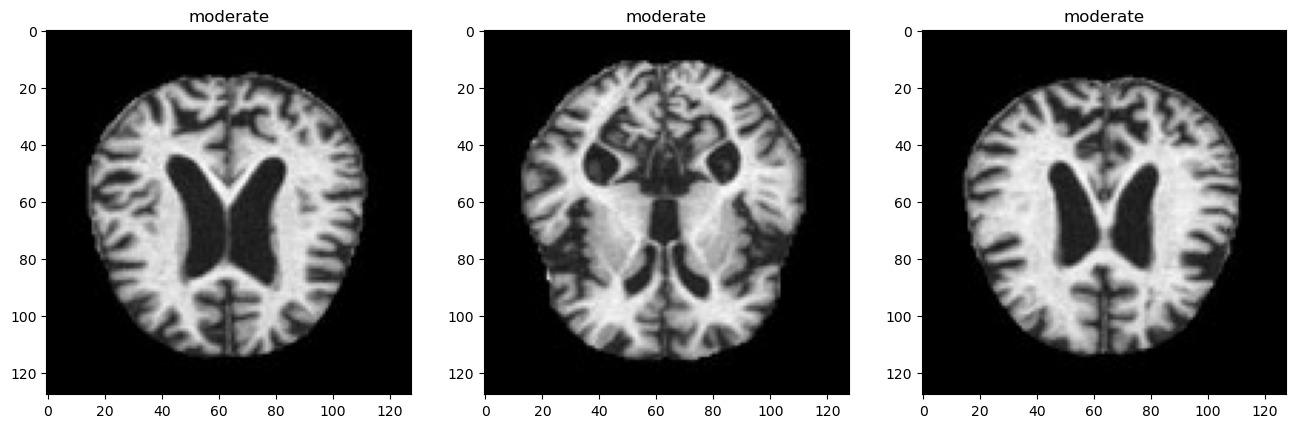

In [83]:
plot_random(mild, very_mild, moderate, healthy)

# Data preparation

## Normalisation

Normalisation is crucial for deep learning. We want to modify the data so that the mean is zero and the standard deviation is one. Therefore ranging between -1 and 1. We do this for including the data in the same range as the activation function for the model. This will allow for less frequent non-zero gradients during training, allowing the neurons in the network to learn faster. Normalising also ensures the channel information can be mixed and updated during the gradient descent (back propagation_ using the same learning rate. 

### Pytorch normalisation

In [96]:
import torch

The images need to be tensors

In [98]:
from torchvision import transforms

C:\Users\Rudol\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Converting from an image to a tensor

In [101]:
mild.shape

(6400, 128, 128, 3)

In [103]:
convert_tensor = transforms.ToTensor()
single_mild = convert_tensor(mild[0])

In [104]:
single_mild

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Checking we can still display the image

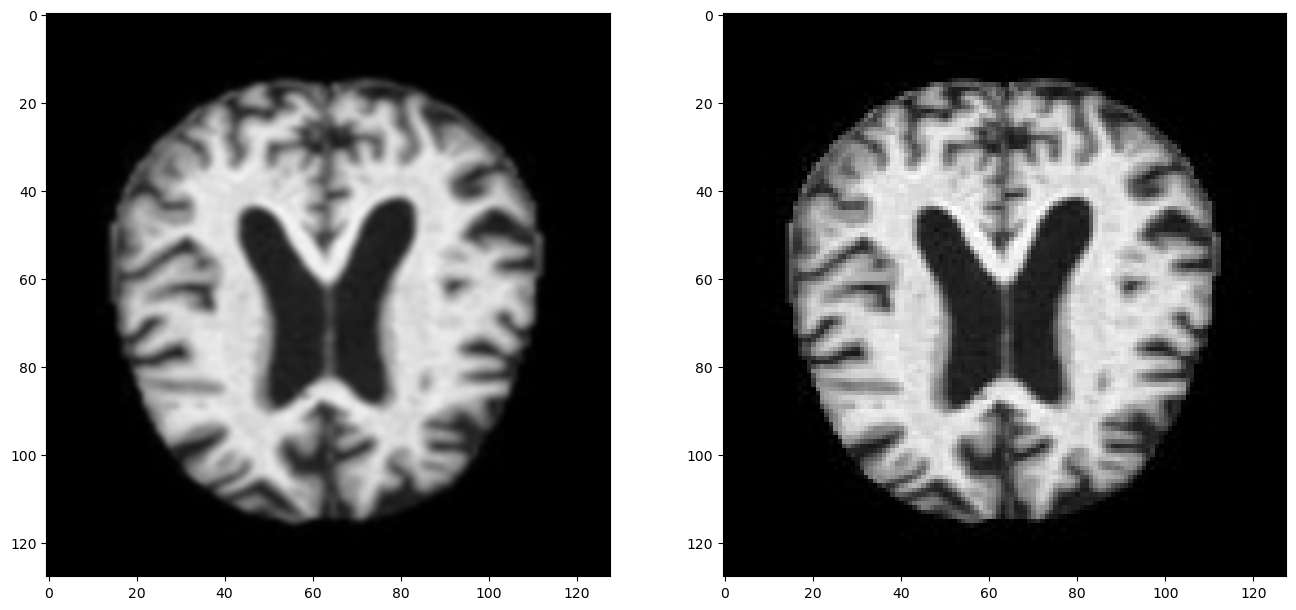

In [116]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(transforms.ToPILImage()(single_mild), interpolation="bicubic")

plt.subplot(122)
plt.imshow(mild[0])

Notice the image that was transformed twice is a little blurry. 

the stack function requires a tuple of tensors, so we can't feed it a single image.

In [121]:
convert_tensor = transforms.ToTensor()

# Using a lambda function

mild_tensors = [convert_tensor(image) for image in mild]

As this provides a list of tensors, we can make it a single tensor, which allows for a more efficient model. The model will be able to distinguish between the separate images even if it's a single tensor. 

In [124]:
mild_tensor = torch.stack(mild_tensors)

In [126]:
mild_tensor.shape

torch.Size([6400, 3, 128, 128])

Getting the mean for each channel (RGB)

In [127]:
mild_tensor.view(3, -1).mean(dim=1)

tensor([0.2676, 0.2806, 0.2877])

In [130]:
mild_tensor.view(3, -1).std(dim = 1)

tensor([0.3186, 0.3244, 0.3368])

We can now use Pytorch's normalisation function from the transform module

In [132]:
norm =  transforms.Normalize(mild_tensor.view(3, -1).mean(dim=1), mild_tensor.view(3, -1).std(dim = 1))

In [133]:
norm_mild = norm(mild_tensor)

In [135]:
print(norm_mild.mean(), norm_mild.std())

tensor(0.0005) tensor(1.0017)


We want 0 and 1 however there may have been rounding errors in the data distribution. We don't want to further round the mean and std as this may introduce precision errors in the future.

## Flattening

Flattening is useful for fully connected networks with dense layers. These networks usually expect 1D input while we currently have 3D. 

Convolutional neural networks can work with 3D tensors directly. CNN is designed to process spatial information